# Importing important modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score,accuracy_score, classification_report, confusion_matrix

# Loading Datasets and finding insights

In [ ]:
data_set=pd.read_csv('/content/2025-09-01T04-03-42.625Z-2025-07-04T13-24-57.561Z-diabetes.csv')

data_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
print((data_set == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


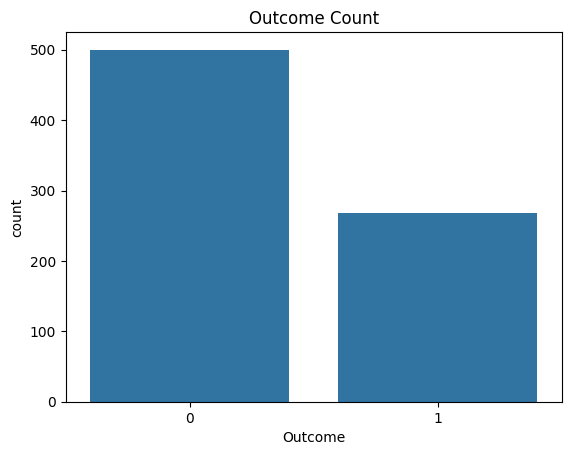

In [ ]:
sns.countplot(x='Outcome', data=data_set)
plt.title('Outcome Count')
plt.show()

In [ ]:
print((data_set == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [ ]:
data_set.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000




```
# This is formatted as code
```

# After seeing various plots and relations I decided not to follow through the features *'Insulin','Pregnancies','SkinThickness'* and hence dropping them


In [ ]:
data_set.drop(labels=['Insulin','Pregnancies','SkinThickness'],axis=1,inplace=True)
data_set.head()

,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,33.6,0.627,50,1
1,85,66,26.6,0.351,31,0
2,183,64,23.3,0.672,32,1
3,89,66,28.1,0.167,21,0
4,137,40,43.1,2.288,33,1


# Finally, separting features and output labels and replaced the zero values with mean values


In [ ]:
X=data_set.drop('Outcome',axis=1)
y=data_set['Outcome']

In [ ]:
X[['Glucose', 'BloodPressure','BMI']] = X[['Glucose', 'BloodPressure','BMI']].apply(lambda x: x.replace(0, x.mean()))

# Scaled all the features using standard scaler and did a train_test_split with 80/20 ratio

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Scaled Features (X_scaled_df):")
X_scaled_df.head()

Scaled Features (X_scaled_df):


,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
0,0.865276,-0.021044,0.167255,0.468492,1.425995
1,-1.205989,-0.516583,-0.851535,-0.365061,-0.190672
2,2.015979,-0.681762,-1.331821,0.604397,-0.105584
3,-1.074480,-0.516583,-0.633222,-0.920763,-1.041549
4,0.503626,-2.663916,1.549899,5.484909,-0.020496


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=69)

#As data was imbalanced, I balanced it

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=69)

# Apply SMOTE to the training data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the class distribution of the resampled training data
print("Class distribution of original training data:")
print(y_train.value_counts())
print("\nClass distribution of resampled training data:")
print(y_train_res.value_counts())
X_train=X_train_res
y_train=y_train_res

Class distribution of original training data:
Outcome
0    401
1    213
Name: count, dtype: int64

Class distribution of resampled training data:
Outcome
0    401
1    401
Name: count, dtype: int64


#Model Training

#1. Logistic Regression model

In [ ]:
linear_model=LogisticRegression(max_iter=50)
linear_model.fit(X_train,y_train)

LogisticRegression(max_iter=50)

In [ ]:
y_predict_logistic=linear_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_predict_logistic)

0.7532467532467533

In [ ]:
logistic_model_report=classification_report(y_test,y_predict_logistic)
logistic_model_confusion_matrix=confusion_matrix(y_test,y_predict_logistic)
print(logistic_model_report)
print(logistic_model_confusion_matrix)

              precision    recall  f1-score   support

           0       0.87      0.73      0.79        99
           1       0.62      0.80      0.70        55

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.78      0.75      0.76       154

[[72 27]
 [11 44]]


#2. K-Nearest-Neighbour

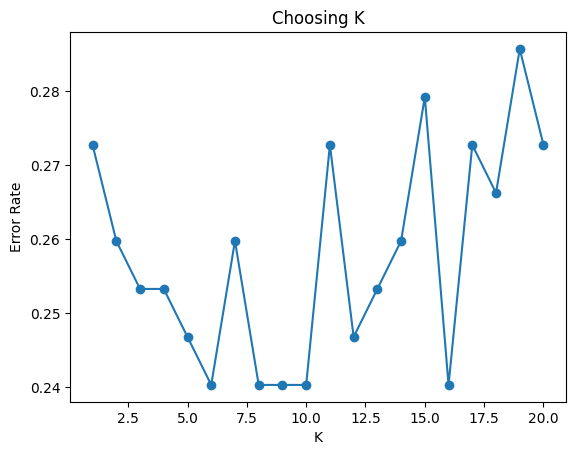

In [ ]:
errors = []
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_k = knn.predict(X_test)
    errors.append(1 - accuracy_score(y_test, pred_k))

plt.plot(range(1, 21), errors, marker='o')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.title('Choosing K')
plt.show()

In [ ]:
K_neares_neighbors=KNeighborsClassifier(n_neighbors=9)
K_neares_neighbors.fit(X_train,y_train)
y_predict_knn=K_neares_neighbors.predict(X_test)
knn_report=classification_report(y_test,y_predict_knn)
knn_confusion_matrix=confusion_matrix(y_test,y_predict_knn)
print(knn_report)
print(knn_confusion_matrix)

              precision    recall  f1-score   support

           0       0.87      0.74      0.80        99
           1       0.63      0.80      0.70        55

    accuracy                           0.76       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.78      0.76      0.76       154

[[73 26]
 [11 44]]


#3. Decision trees

Accuracy: 0.7467532467532467
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



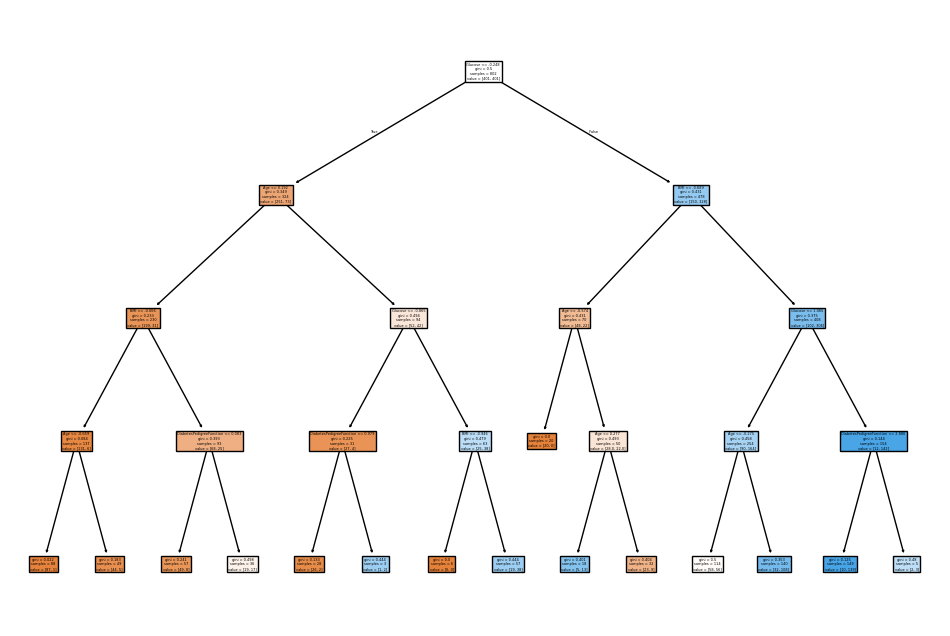

In [ ]:
model_tree = DecisionTreeClassifier(max_depth=4)
model_tree.fit(X_train, y_train)
pred_tree = model_tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred_tree))
print(classification_report(y_test, pred_tree))

# Visualize Tree
plt.figure(figsize=(12,8))
plot_tree(model_tree, filled=True, feature_names=X.columns)
plt.show()

#4. Random Forest

In [ ]:
random_forest_model = RandomForestClassifier(n_estimators=130, random_state=67)
random_forest_model.fit(X_train, y_train)
pred_rf = random_forest_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

Accuracy: 0.7662337662337663
              precision    recall  f1-score   support

           0       0.84      0.79      0.81        99
           1       0.66      0.73      0.69        55

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.77      0.77      0.77       154



#Comparison of models

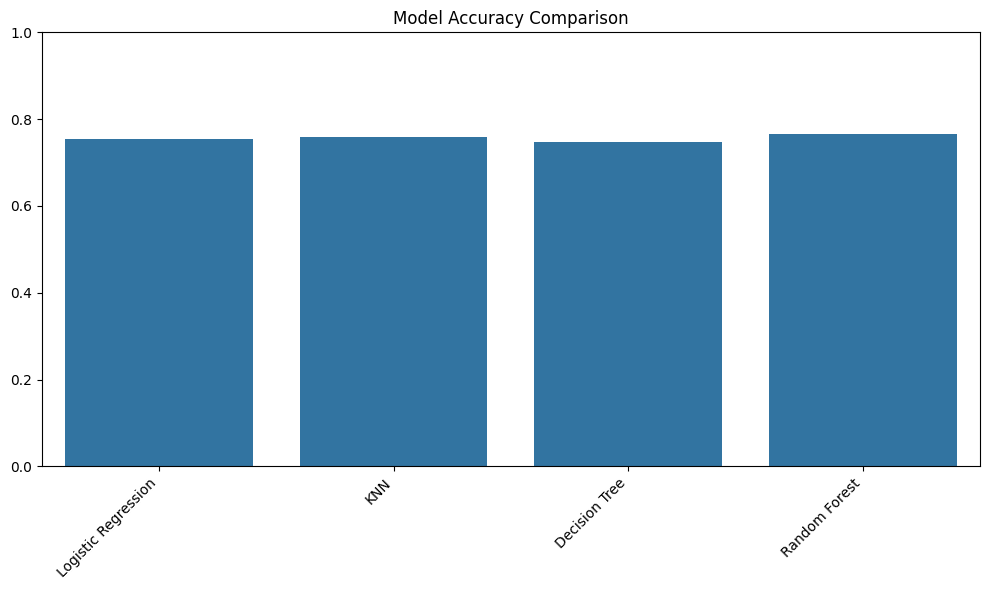

In [ ]:
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracies = [accuracy_score(y_test, y_predict_logistic),
              accuracy_score(y_test, y_predict_knn),
              accuracy_score(y_test, pred_tree),
              accuracy_score(y_test, pred_rf)]
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


🔍 Confusion Matrix for Logistic Regression:
[[72 27]
 [11 44]]
              precision    recall  f1-score   support

           0       0.87      0.73      0.79        99
           1       0.62      0.80      0.70        55

    accuracy                           0.75       154
   macro avg       0.74      0.76      0.74       154
weighted avg       0.78      0.75      0.76       154


🔍 Confusion Matrix for KNN:
[[73 26]
 [11 44]]
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        99
           1       0.63      0.80      0.70        55

    accuracy                           0.76       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.78      0.76      0.76       154


🔍 Confusion Matrix for Decision Tree:
[[78 21]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy

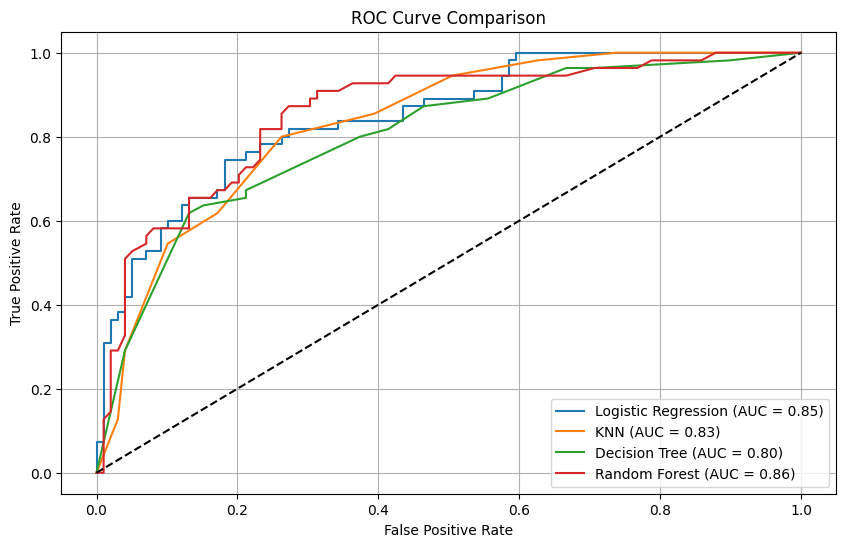

In [ ]:
models = {
    'Logistic Regression': linear_model,
    'KNN': K_neares_neighbors,
    'Decision Tree': model_tree,
    'Random Forest': random_forest_model,
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n🔍 Confusion Matrix for {name}:")
    print(cm)
    print(classification_report(y_test, y_pred))
    results[name] = (model, y_pred)
# Plot ROC curves
plt.figure(figsize=(10, 6))
for name, (model, _) in results.items():
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid()
plt.show()